In [86]:
import pandas as pd
import yfinance as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import platform
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# for korean language
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

dataVoo = pd.DataFrame(fdr.DataReader('AAPL', start='2000-01-01', end='2023-03-01'))

different = dataVoo.index[-1] - dataVoo.index[0]
invstDays = different.days / 250

# CAGR: Compound Annual Growth Rate
returnCagr = (dataVoo.iloc[-1, 0] / dataVoo.iloc[0, 0]) ** (1 / invstDays) - 1
print(returnCagr * 100)

# HPR : Holding Period Return
print((dataVoo.iloc[-1, 0] / dataVoo.iloc[0, 0] - 1) * 100)
print(dataVoo.iloc[-1, 0])
print(dataVoo.iloc[0, 0])

16.12265686701044
15604.027727940675
147.050003
0.936384


          category
category          
보합              16
상승            2983
하락            2827


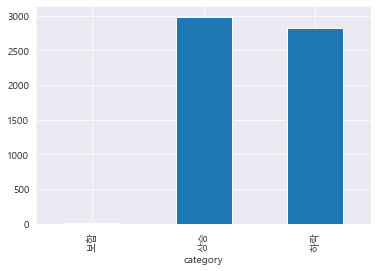

In [88]:

dataRefining = pd.DataFrame(dataVoo['Close'])

upward = dataVoo['Open'] < dataVoo['Close']
downward = dataVoo['Open'] > dataVoo['Close']
stationary = dataVoo['Open'] == dataVoo['Close']

dataRefining.loc[upward, 'category'] = '상승'
dataRefining.loc[downward, 'category'] = '하락'
dataRefining.loc[stationary, 'category'] = '보합'

how = {
    "category": len
}
print(dataRefining.groupby('category').agg(how))

dataRefining.groupby('category').agg(how).plot.bar(legend=False)
plt.show()

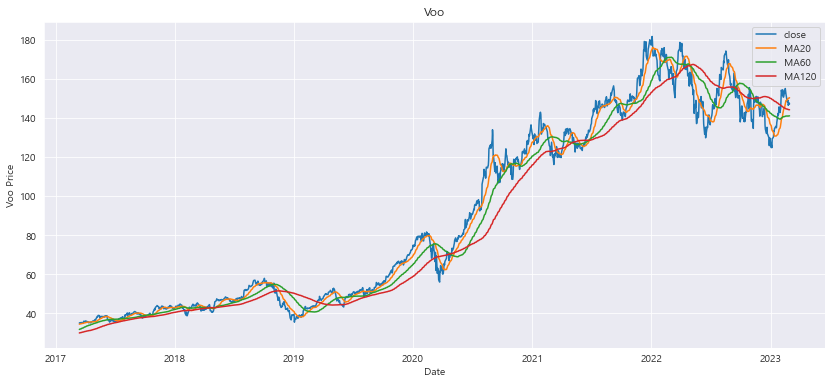

In [89]:
df_limit = 1500
dataVoo["MA20"] = dataVoo['Close'].rolling(window=20).mean()
dataVoo["MA60"] = dataVoo['Close'].rolling(window=60).mean()
dataVoo["MA120"] = dataVoo['Close'].rolling(window=120).mean()

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(dataVoo['Close'][-df_limit:], label="close")
ax.plot(dataVoo['MA20'][-df_limit:], label="MA20")
ax.plot(dataVoo['MA60'][-df_limit:], label="MA60")
ax.plot(dataVoo['MA120'][-df_limit:], label="MA120")

ax.set_xlabel("Date")
ax.set_ylabel("Voo Price")
ax.set_title("Voo")
ax.legend(loc="best")
plt.grid(True, axis='y')
plt.show()

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

D:\99.Dev\Python\pythonProject\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
D:\99.Dev\Python\pythonProject\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


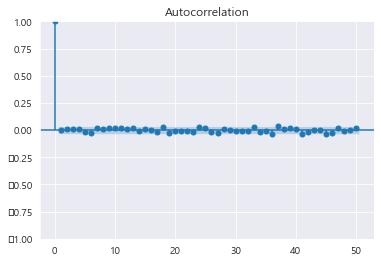

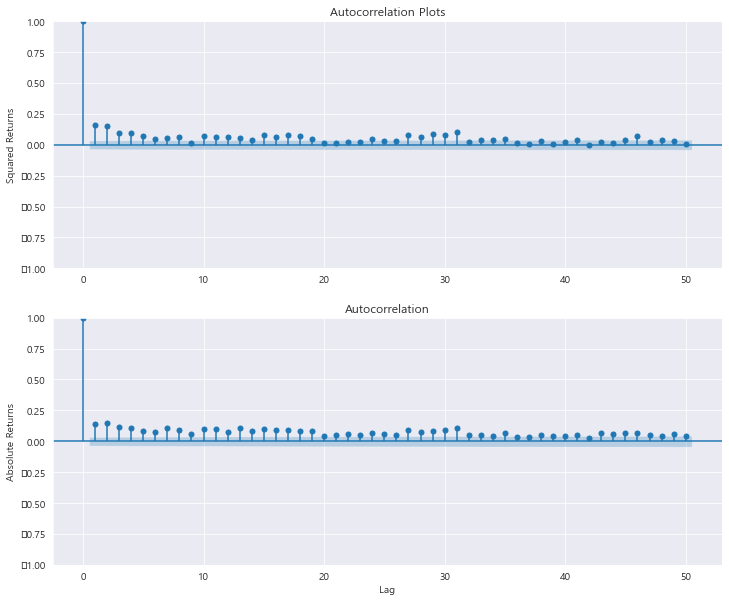

In [92]:
df = fdr.DataReader('TSLA', start='2010-01-01', end='2023-03-31')

df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how='any')

# numpy.linspace : return evenly spaced parameter numbers for statistics such as Histogram
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

# Autocorrelation of df.log_rtn chk
acf = smt.graphics.plot_acf(df.log_rtn, lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL, ax=ax[0])
ax[0].set(title='Autocorrelation Plots', ylabel='Squared Returns')

smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL, ax=ax[1])
ax[1].set(ylabel='Absolute Returns', xlabel='Lag')

C:\Users\19498\AppData\Local\Temp\ipykernel_17584\4184489419.py:17: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
D:\99.Dev\Python\pythonProject\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


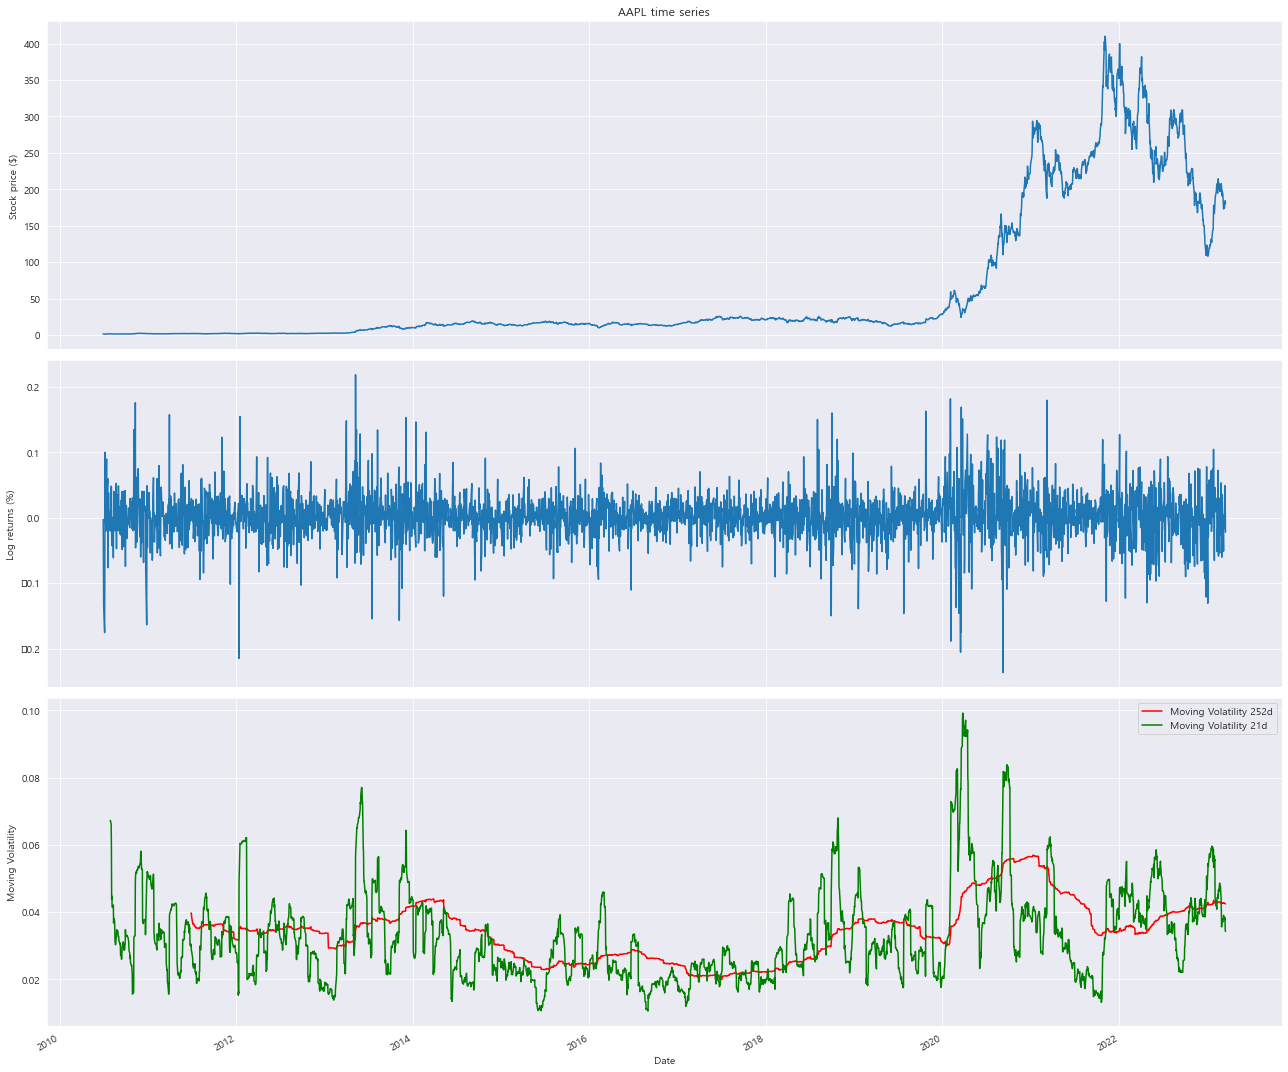

In [93]:

df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

fig, ax = plt.subplots(3, 1, figsize=(18, 15), sharex=True)

df.adj_close.plot(ax=ax[0])
ax[0].set(title='AAPL time series', ylabel='Stock price ($)')

df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')

df.moving_std_252.plot(ax=ax[2], color='r', label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g', label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility', xlabel='Date')
ax[2].legend()

plt.tight_layout()
plt.show()
# the correlation between stock price and volatility of the asset is negative
# (= the volatility increased while the stock price was decreasing) check the line 66.

#print(df.moving_std_252.tail())
#print(df.moving_std_21.tail())

AttributeError: 'Axes' object has no attribute 'show'

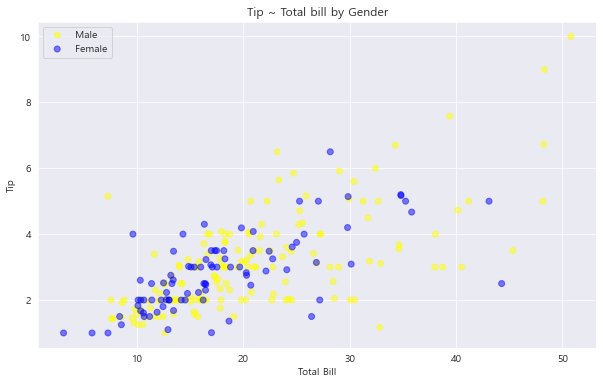

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
x = tips['total_bill']
y= tips['tip']

tips['sex_color']=tips['sex'].map({"Female":"#0000FF", "Male":"#FFFF00"})

fig, ax = plt.subplots(figsize=(10, 6))
for label, data in tips.groupby('sex'):
    ax.scatter(data['total_bill'], data['tip'], label = label, color=data['sex_color'], alpha=0.5)
    ax.set_xlabel('Total Bill')
    ax.set_ylabel('Tip')
    ax.set_title('Tip ~ Total bill by Gender')

ax.legend()
ax.show()